<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/Gradient%20Descent%20for%20Multivariate%20Regression-CANCER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

uno.webp

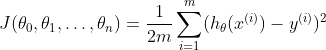

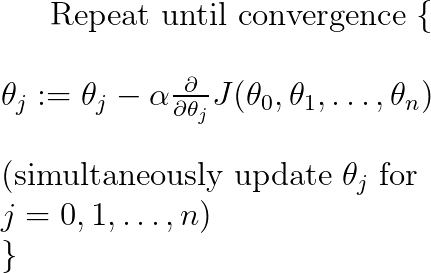

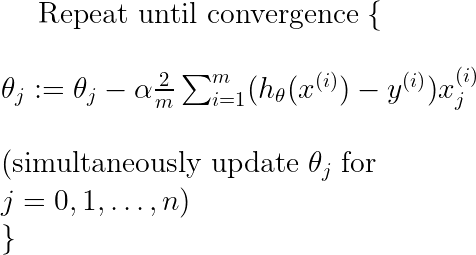

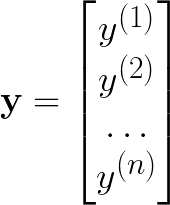

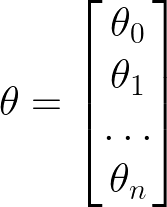

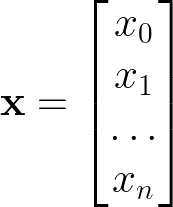

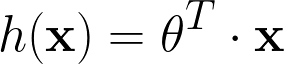

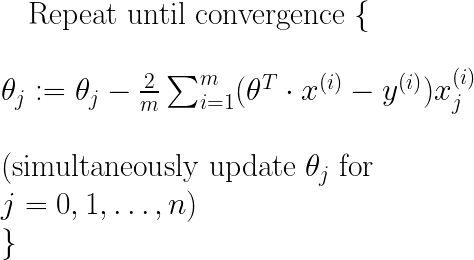

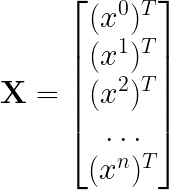  


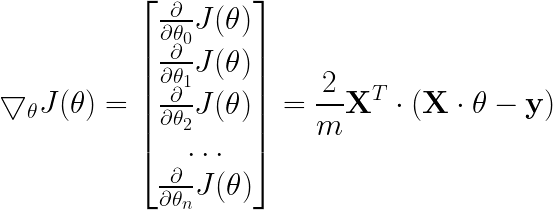

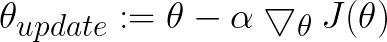

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

# Implementing Gradient Descent

In [2]:
def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes values
    """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

In [3]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0])+1, 1)
    return theta

In [4]:
def Multivariable_Linear_Regression(X,y,learningrate, iterations):
    """ Find the multivarite regression model for the data set
         Parameters:
          X:  independent variables matrix
          y: dependent variables matrix
          learningrate: learningrate of Gradient Descent
          iterations: the number of iterations
        Return value: the final theta vector and the plot of cost function
    """
    y_new = np.reshape(y, (len(y), 1))
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(vectorX.dot(theta) - y_new)
        theta = theta - learningrate * gradients
        y_pred = vectorX.dot(theta)
        cost_value = 1/(2*len(y))*((y_pred - y)**2) #Calculate the loss for each training instance
        total = 0
        for i in range(len(y)):
            total += cost_value[i][0] #Calculate the cost function for each iteration
        cost_lst.append(total)
    plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return theta

# Checking the code with built-in Linear Regression from sklearn

In [6]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X.shape

(442, 10)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_transform, y)
lin_reg.intercept_, lin_reg.coef_

(152.13348416289594,
 array([ -0.47623169, -11.40703082,  24.72625713,  15.42967916,
        -37.68035801,  22.67648701,   4.80620008,   8.422084  ,
         35.73471316,   3.21661161]))

array([[152.13348416],
       [ -0.47623165],
       [-11.40703078],
       [ 24.72625722],
       [ 15.42967913],
       [-37.68035063],
       [ 22.67648115],
       [  4.80619678],
       [  8.42208306],
       [ 35.73471041],
       [  3.21661164]])

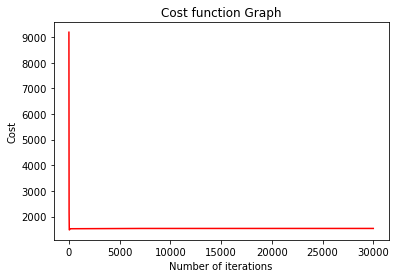

In [ ]:
Multivariable_Linear_Regression(X_transform,y, 0.03, 30000)